<a href="https://colab.research.google.com/github/John012-11/3D-Brain-Tumor-Segmentation-with-Transformers-Architecture/blob/main/ThesisWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import necessary libraries
!pip install datasets
import json
import os
from transformers import AutoTokenizer
import torch
from tqdm.auto import tqdm # tqdm.auto works well in notebooks
import time # To timestamp output files

print("Libraries imported.")

Number of code snippets analyzed: 330491
Minimum length: 1
Maximum length: 484356
Average length: 1313.86
Median length: 516.0


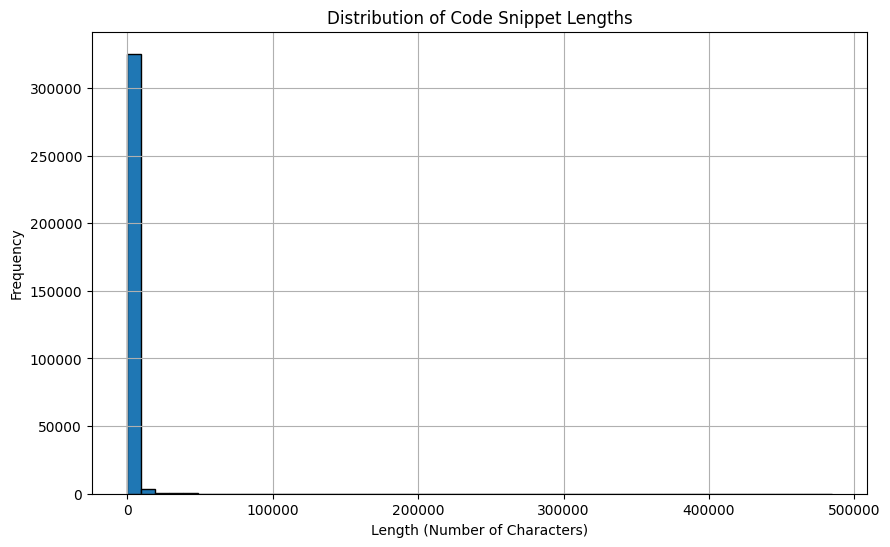


Percentiles of code lengths:
10%: 122
25%: 232
50%: 516
75%: 1221
90%: 2744
95%: 4510
99%: 12890


In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

code_lengths = []
with open('diversevul_20230702.json', 'r') as f:
    for line in f:
        try:
            record = json.loads(line)
            code = record.get('func')
            if code:
                code_lengths.append(len(code))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            continue

if code_lengths:
    print(f"Number of code snippets analyzed: {len(code_lengths)}")
    print(f"Minimum length: {min(code_lengths)}")
    print(f"Maximum length: {max(code_lengths)}")
    print(f"Average length: {np.mean(code_lengths):.2f}")
    print(f"Median length: {np.median(code_lengths)}")

    # Create a histogram to visualize the distribution of lengths
    plt.figure(figsize=(10, 6))
    plt.hist(code_lengths, bins=50, edgecolor='black')
    plt.title('Distribution of Code Snippet Lengths')
    plt.xlabel('Length (Number of Characters)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # You can also look at percentiles to get a better idea
    print("\nPercentiles of code lengths:")
    for p in [10, 25, 50, 75, 90, 95, 99]:
        print(f"{p}%: {np.percentile(code_lengths, p):.0f}")
else:
    print("No code snippets found in the dataset.")

In [4]:
import json
from datasets import Dataset  # Using Hugging Face Datasets for easier handling

data = []
with open('diversevul_20230702.json', 'r') as f:
    for line in f:
        try:
            record = json.loads(line)
            data.append({'func': record['func'], 'target': record['target']})
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            continue

# Create a Hugging Face Dataset
dataset = Dataset.from_list(data)

print(dataset)
print(dataset[0])

Dataset({
    features: ['func', 'target'],
    num_rows: 330492
})
{'func': 'int _gnutls_ciphertext2compressed(gnutls_session_t session,\n\t\t\t\t  opaque * compress_data,\n\t\t\t\t  int compress_size,\n\t\t\t\t  gnutls_datum_t ciphertext, uint8 type)\n{\n    uint8 MAC[MAX_HASH_SIZE];\n    uint16 c_length;\n    uint8 pad;\n    int length;\n    mac_hd_t td;\n    uint16 blocksize;\n    int ret, i, pad_failed = 0;\n    uint8 major, minor;\n    gnutls_protocol_t ver;\n    int hash_size =\n\t_gnutls_hash_get_algo_len(session->security_parameters.\n\t\t\t\t  read_mac_algorithm);\n\n    ver = gnutls_protocol_get_version(session);\n    minor = _gnutls_version_get_minor(ver);\n    major = _gnutls_version_get_major(ver);\n\n    blocksize = _gnutls_cipher_get_block_size(session->security_parameters.\n\t\t\t\t\t      read_bulk_cipher_algorithm);\n\n    /* initialize MAC \n     */\n    td = mac_init(session->security_parameters.read_mac_algorithm,\n\t\t  session->connection_state.read_mac_secret.d

In [5]:
from transformers import AutoTokenizer

# Replace 'microsoft/codebert-base' with the actual pre-trained model you intend to use
model_name = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
def tokenize_function(examples):
    return tokenizer(examples['func'], truncation=True, padding='max_length', max_length=512) # Adjust max_length as needed

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Remove the original 'func' column as it's no longer needed
tokenized_dataset = tokenized_dataset.remove_columns(['func'])

print(tokenized_dataset)
print(tokenized_dataset[0])
print(tokenizer.decode(tokenized_dataset[0]['input_ids']))

Map:   0%|          | 0/330492 [00:00<?, ? examples/s]

Dataset({
    features: ['target', 'input_ids', 'attention_mask'],
    num_rows: 330492
})
{'target': 1, 'input_ids': [0, 2544, 18134, 16993, 1182, 6634, 1215, 438, 38914, 29015, 176, 11828, 10887, 1640, 16993, 1182, 6634, 1215, 39035, 1215, 90, 1852, 6, 50118, 50117, 50117, 50117, 50117, 1437, 31861, 1009, 37175, 1215, 23687, 6, 50118, 50117, 50117, 50117, 50117, 1437, 6979, 37175, 1215, 10799, 6, 50118, 50117, 50117, 50117, 50117, 1437, 821, 10873, 6634, 1215, 36146, 783, 1215, 90, 47601, 29015, 6, 49315, 398, 1907, 43, 50118, 45152, 50118, 1437, 1437, 1437, 49315, 398, 19482, 10975, 30187, 1215, 725, 13246, 1215, 49340, 44082, 50118, 1437, 1437, 1437, 49315, 1549, 740, 1215, 16096, 131, 50118, 1437, 1437, 1437, 49315, 398, 11212, 131, 50118, 1437, 1437, 1437, 6979, 5933, 131, 50118, 1437, 1437, 1437, 13418, 1215, 35905, 1215, 90, 47084, 131, 50118, 1437, 1437, 1437, 49315, 1549, 5491, 2072, 131, 50118, 1437, 1437, 1437, 6979, 5494, 6, 939, 6, 11212, 1215, 38323, 5457, 321, 131, 5011

In [ ]:
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
import numpy as np
from transformers import AutoTokenizer
from datasets import Dataset  # Using Hugging Face Datasets for easier handling
import json
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
# Replace 'microsoft/codebert-base' with the actual pre-trained model you intend to use
model_name = 'google-bert/bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples['func'], truncation=True, padding='max_length', max_length=512) # Adjust max_length as needed

# Load your data
data = []
with open('diversevul_20230702.json', 'r') as f:
    for line in f:
        try:
            record = json.loads(line)
            data.append({'func': record['func'], 'target': record['target']})
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            continue

# Create a Hugging Face Dataset
dataset = Dataset.from_list(data)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(['func'])

# Assuming your tokenized_dataset has columns 'input_ids', 'attention_mask', and 'target'
# Convert the Hugging Face Dataset to a format that train_test_split can handle
input_ids = tokenized_dataset['input_ids']
attention_mask = tokenized_dataset['attention_mask']
targets = tokenized_dataset['target']

# Split the data into training and testing sets
train_input_ids, test_input_ids, train_attention_mask, test_attention_mask, train_targets, test_targets = train_test_split(
    input_ids, attention_mask, targets, test_size=0.2, random_state=42, stratify=targets
)

# Create new Hugging Face Dataset objects for the training and testing sets
train_dataset = Dataset.from_dict({
    'input_ids': train_input_ids,
    'attention_mask': train_attention_mask,
    'target': train_targets
})

test_dataset = Dataset.from_dict({
    'input_ids': test_input_ids,
    'attention_mask': test_attention_mask,
    'target': test_targets
})

# Combine them into a DatasetDict (optional, but often useful for Hugging Face workflows)
split_dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

print("Training dataset size:", len(train_dataset))
print("Testing dataset size:", len(test_dataset))
print("Training class distribution:", np.bincount(train_dataset['target']))
print("Testing class distribution:", np.bincount(test_dataset['target']))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/330492 [00:00<?, ? examples/s]

In [1]:
print(model.config)

NameError: name 'model' is not defined